# Problem Statement
Solving this case study will give you an idea about how real business problems are solved using EDA and Random Forest. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1.If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2.If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


# Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:/dswf/loan.csv')

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.shape

(39717, 111)

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 30.0+ MB


# Data Cleaning

In [8]:
# Adding the missing values(column wise)
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
# Checking the percentage of missing values
round(100*(df.isnull().sum(axis=0))/len(df.index),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [10]:
# You could find that the Columns related to the customer behaviour data cann't be collected at the time of application. 
# Removing Customer Behaviour variables
df=df.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp',
               'out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
               'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','application_type'], axis=1)

In [11]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 90, dtype: int64

In [12]:
# Dropping the columns which has greater than 70% missing values
df= df.loc[:,round(100*(df.isnull().sum()/len(df.index)),2) < 70]

In [13]:
# Null value percentage in each column
round(100*(df.isnull().sum(axis=0))/len(df.index),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
mths_since_last_delinq        64.66
initial_list_status            0.00
total_pymnt                 

In [14]:
df =df.drop(['member_id','id','acc_now_delinq','chargeoff_within_12_mths','pymnt_plan','initial_list_status','delinq_amnt','pub_rec_bankruptcies','tax_liens','collections_12_mths_ex_med','policy_code','url','emp_title','zip_code','addr_state','title','desc'], axis=1)

In [15]:
# Verifying Null value percentage in each column
round(100*(df.isnull().sum(axis=0))/len(df.index),2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
dti                        0.00
mths_since_last_delinq    64.66
total_pymnt                0.00
dtype: float64

In [16]:
# Removing the rows with the null values of the following column since we need to do analysis on them
df= df[~pd.isnull(df['mths_since_last_delinq'])]
df = df[~pd.isnull(df['emp_length'])]

In [17]:
# Checking the percentage of null values
round(100*(df.isnull().sum(axis=0))/len(df.index),2)

loan_amnt                 0.0
funded_amnt               0.0
funded_amnt_inv           0.0
term                      0.0
int_rate                  0.0
installment               0.0
grade                     0.0
sub_grade                 0.0
emp_length                0.0
home_ownership            0.0
annual_inc                0.0
verification_status       0.0
issue_d                   0.0
loan_status               0.0
purpose                   0.0
dti                       0.0
mths_since_last_delinq    0.0
total_pymnt               0.0
dtype: float64

In [18]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,mths_since_last_delinq,total_pymnt
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,35.0,12231.890000
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,38.0,3513.330000
16,10000,10000,10000.0,36 months,15.27%,347.98,C,C4,4 years,RENT,42000.0,Not Verified,Dec-11,Fully Paid,home_improvement,18.60,61.0,12527.150000
18,6000,6000,6000.0,36 months,11.71%,198.46,B,B3,1 year,MORTGAGE,84000.0,Verified,Dec-11,Fully Paid,medical,18.44,8.0,7167.072893
27,5000,5000,5000.0,60 months,16.77%,123.65,D,D2,2 years,RENT,50004.0,Not Verified,Dec-11,Charged Off,other,13.97,20.0,1609.120000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13690 entries, 3 to 39716
Data columns (total 18 columns):
loan_amnt                 13690 non-null int64
funded_amnt               13690 non-null int64
funded_amnt_inv           13690 non-null float64
term                      13690 non-null object
int_rate                  13690 non-null object
installment               13690 non-null float64
grade                     13690 non-null object
sub_grade                 13690 non-null object
emp_length                13690 non-null object
home_ownership            13690 non-null object
annual_inc                13690 non-null float64
verification_status       13690 non-null object
issue_d                   13690 non-null object
loan_status               13690 non-null object
purpose                   13690 non-null object
dti                       13690 non-null float64
mths_since_last_delinq    13690 non-null float64
total_pymnt               13690 non-null float64
dtypes: float64(6), int

In [20]:
#the 'int_rate' is converted from % to a numeric value
df['int_rate'] =df['int_rate'].str.replace('%', '')
df['int_rate']=df['int_rate'].astype(float)
df['int_rate']=df['int_rate'].apply(lambda x : x/100)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,mths_since_last_delinq,total_pymnt
3,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,35.0,12231.890000
4,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,38.0,3513.330000
16,10000,10000,10000.0,36 months,0.1527,347.98,C,C4,4 years,RENT,42000.0,Not Verified,Dec-11,Fully Paid,home_improvement,18.60,61.0,12527.150000
18,6000,6000,6000.0,36 months,0.1171,198.46,B,B3,1 year,MORTGAGE,84000.0,Verified,Dec-11,Fully Paid,medical,18.44,8.0,7167.072893
27,5000,5000,5000.0,60 months,0.1677,123.65,D,D2,2 years,RENT,50004.0,Not Verified,Dec-11,Charged Off,other,13.97,20.0,1609.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,11.33,0.0,2822.969293
39713,8500,8500,875.0,36 months,0.1028,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,6.40,5.0,9913.491822
39714,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,2.30,0.0,5272.161128
39715,5000,5000,650.0,36 months,0.0743,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,3.72,0.0,5174.198551


In [21]:
from sklearn import preprocessing
# encode categorical variables using Label Encoder
# select all categorical variables
df_categorical =df.select_dtypes(include=['object'])
df_categorical.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose
3,36 months,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other
4,60 months,B,B5,1 year,RENT,Source Verified,Dec-11,Current,other
16,36 months,C,C4,4 years,RENT,Not Verified,Dec-11,Fully Paid,home_improvement
18,36 months,B,B3,1 year,MORTGAGE,Verified,Dec-11,Fully Paid,medical
27,60 months,D,D2,2 years,RENT,Not Verified,Dec-11,Charged Off,other


In [22]:
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose
3,0,2,10,1,4,1,13,2,9
4,1,1,9,0,4,1,13,1,9
16,0,2,13,4,4,0,13,2,4
18,0,1,7,0,0,2,13,2,7
27,1,3,16,2,4,0,13,0,9


In [23]:
# concat df_categorical with original df
df= df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,mths_since_last_delinq,total_pymnt,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose
3,10000,10000,10000.0,0.1349,339.31,49200.0,20.00,35.0,12231.890000,0,2,10,1,4,1,13,2,9
4,3000,3000,3000.0,0.1269,67.79,80000.0,17.94,38.0,3513.330000,1,1,9,0,4,1,13,1,9
16,10000,10000,10000.0,0.1527,347.98,42000.0,18.60,61.0,12527.150000,0,2,13,4,4,0,13,2,4
18,6000,6000,6000.0,0.1171,198.46,84000.0,18.44,8.0,7167.072893,0,1,7,0,0,2,13,2,7
27,5000,5000,5000.0,0.1677,123.65,50004.0,13.97,20.0,1609.120000,1,3,16,2,4,0,13,0,9


In [24]:
# Let's understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13690 entries, 3 to 39716
Data columns (total 18 columns):
loan_amnt                 13690 non-null int64
funded_amnt               13690 non-null int64
funded_amnt_inv           13690 non-null float64
int_rate                  13690 non-null float64
installment               13690 non-null float64
annual_inc                13690 non-null float64
dti                       13690 non-null float64
mths_since_last_delinq    13690 non-null float64
total_pymnt               13690 non-null float64
term                      13690 non-null int32
grade                     13690 non-null int32
sub_grade                 13690 non-null int32
emp_length                13690 non-null int32
home_ownership            13690 non-null int32
verification_status       13690 non-null int32
issue_d                   13690 non-null int32
loan_status               13690 non-null int32
purpose                   13690 non-null int32
dtypes: float64(7), int32(9), i

# Data preparation and Model Building

In [25]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [26]:
# Putting feature variable to X
X = df.drop('loan_status',axis=1)

# Putting response variable to y
y = df['loan_status']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size=0.3, random_state=101)

### Default Hyperparameters

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [28]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
predictions = rfc.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       609
           1       0.33      0.05      0.08       107
           2       0.93      0.99      0.96      3391

    accuracy                           0.93      4107
   macro avg       0.73      0.59      0.62      4107
weighted avg       0.91      0.93      0.92      4107



In [32]:
print(confusion_matrix(y_test,predictions))

[[ 450    0  159]
 [   1    5  101]
 [  26   10 3355]]


In [33]:
print(accuracy_score(y_test,predictions))

0.9276844411979547


## Hyperparameter Tuning

### Tuning max_depth

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds=5
parameters={'max_depth':range(2,20,5)}
rf=RandomForestClassifier()
rf=GridSearchCV(rf,parameters,cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [35]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057587,0.005988,0.007196,1.597922e-03,2,{'max_depth': 2},0.832117,0.827856,0.828288,0.823069,...,0.826881,0.003447,4,0.834703,0.828072,0.830181,0.823008,0.823008,0.827794,0.004457
1,0.138262,0.005317,0.006400,1.958652e-03,7,{'max_depth': 7},0.897810,0.898279,0.882568,0.887265,...,0.890744,0.006236,3,0.910894,0.907905,0.904135,0.895135,0.901135,0.903841,0.005467
2,0.201570,0.006475,0.007200,1.599836e-03,12,{'max_depth': 12},0.919187,0.914971,0.913361,0.921190,...,0.917667,0.002978,1,0.960470,0.959040,0.957350,0.957089,0.957871,0.958364,0.001248
3,0.227035,0.003792,0.007999,6.143617e-07,17,{'max_depth': 17},0.920751,0.919666,0.912317,0.921190,...,0.917667,0.003610,1,0.991781,0.992695,0.990740,0.988261,0.993218,0.991339,0.001755


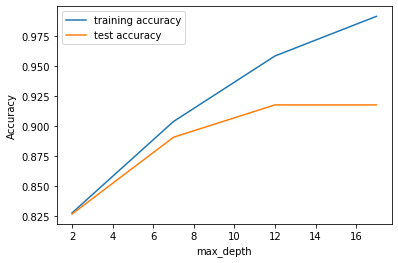

In [36]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds=5
parameters={"n_estimators":range(10,200,50)}
rf=RandomForestClassifier(max_depth=5)
rf=GridSearchCV(rf,parameters,cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [38]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.105572,0.007416,0.007200,0.001599,10,{'n_estimators': 10},0.877998,0.880543,0.871608,0.885699,...,0.874361,0.010261,1,0.880626,0.877642,0.878049,0.889527,0.859919,0.877152,0.009625
1,0.599740,0.006138,0.025623,0.003258,60,{'n_estimators': 60},0.873827,0.875326,0.873173,0.876827,...,0.874048,0.001946,2,0.878669,0.879729,0.880136,0.877918,0.878440,0.878978,0.000826
2,1.166545,0.089629,0.045590,0.007836,110,{'n_estimators': 110},0.870177,0.877413,0.875261,0.871608,...,0.873004,0.002844,4,0.876321,0.880903,0.878831,0.874788,0.876484,0.877465,0.002150
3,1.654430,0.101105,0.073580,0.017805,160,{'n_estimators': 160},0.872263,0.873239,0.875783,0.873695,...,0.873630,0.001172,3,0.879713,0.877772,0.879223,0.875962,0.879484,0.878431,0.001408


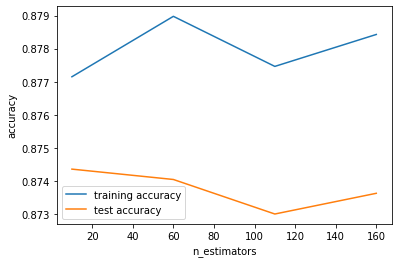

In [39]:
plt.figure()
plt.plot(scores['param_n_estimators'],scores['mean_train_score'],label="training accuracy")
plt.plot(scores['param_n_estimators'],scores['mean_test_score'],label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()
plt.show()


### Tuning max_features

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds=5
parameters={"max_features":[3,6,9,12,15]}
rf=RandomForestClassifier(max_depth=5)
rf=GridSearchCV(rf,parameters,cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [41]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.097558,0.008262,0.006397,0.001956,3,{'max_features': 3},0.875391,0.869588,0.866388,0.851775,...,0.866117,0.007817,5,0.879061,0.874380,0.871527,0.855615,0.873745,0.870866,0.008010
1,0.158729,0.012747,0.004807,0.001596,6,{'max_features': 6},0.889990,0.894105,0.881002,0.899269,...,0.888448,0.007984,4,0.894586,0.896948,0.888483,0.898787,0.884440,0.892649,0.005379
2,0.194360,0.003543,0.006390,0.001972,9,{'max_features': 9},0.895725,0.899322,0.903967,0.906054,...,0.900240,0.004141,3,0.903979,0.901905,0.905961,0.902569,0.904004,0.903684,0.001399
3,0.287178,0.016563,0.006023,0.001775,12,{'max_features': 12},0.904588,0.908190,0.908664,0.907098,...,0.905875,0.002887,2,0.909198,0.908949,0.913786,0.905700,0.910786,0.909684,0.002634
4,0.377109,0.066350,0.004798,0.001601,15,{'max_features': 15},0.899896,0.915493,0.912317,0.911273,...,0.909319,0.005342,1,0.910502,0.920428,0.918612,0.915873,0.915612,0.916206,0.003365


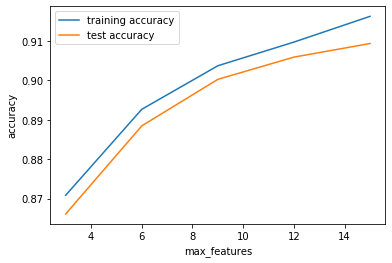

In [42]:
plt.figure()
plt.plot(scores['param_max_features'],scores['mean_train_score'],label="training accuracy")
plt.plot(scores['param_max_features'],scores['mean_test_score'],label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds=5
parameters={"min_samples_leaf":range(100,400,50)}
rf=RandomForestClassifier()
rf=GridSearchCV(rf,parameters,cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [44]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.127890,0.012163,0.005600,0.001959,100,{'min_samples_leaf': 100},0.865485,0.870631,0.851253,0.857516,...,0.860795,0.006686,1,0.866797,0.870728,0.857832,0.852485,0.867354,0.863039,0.006788
1,0.112811,0.005906,0.006400,0.001959,150,{'min_samples_leaf': 150},0.850365,0.848200,0.853340,0.846033,...,0.844203,0.010838,2,0.853359,0.851031,0.854963,0.841789,0.823008,0.844830,0.011826
2,0.099974,0.002529,0.007199,0.001599,200,{'min_samples_leaf': 200},0.850886,0.825769,0.825678,0.854906,...,0.836064,0.013838,3,0.859752,0.826115,0.827703,0.851050,0.823008,0.837526,0.014929
3,0.096782,0.001614,0.006405,0.001963,250,{'min_samples_leaf': 250},0.822732,0.824204,0.823069,0.823069,...,0.823229,0.000505,4,0.823744,0.825463,0.823008,0.823008,0.823008,0.823646,0.000952
4,0.090377,0.003199,0.004800,0.001599,300,{'min_samples_leaf': 300},0.822732,0.823161,0.823069,0.823069,...,0.823020,0.000148,5,0.823092,0.822985,0.823008,0.823008,0.823008,0.823020,0.000037


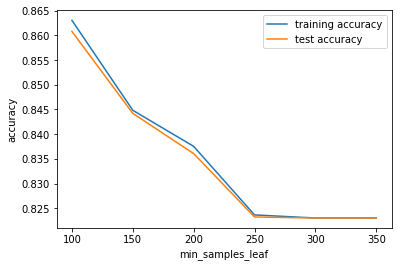

In [45]:
plt.figure()
plt.plot(scores['param_min_samples_leaf'],scores['mean_train_score'],label="training accuracy")
plt.plot(scores['param_min_samples_leaf'],scores['mean_test_score'],label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split¶

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds=5
parameters={"min_samples_split":range(100,500,50)}
rf=RandomForestClassifier()
rf=GridSearchCV(rf,parameters,cv=n_folds,return_train_score=True,scoring="accuracy")
rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [47]:
scores=rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.187110,0.010582,0.005600,0.003200,100,{'min_samples_split': 100},0.897810,0.908190,0.909186,0.915449,...,0.906188,0.006379,1,0.908415,0.915080,0.920960,0.917438,0.910786,0.914536,0.004506
1,0.179202,0.013807,0.007200,0.001599,150,{'min_samples_split': 150},0.902503,0.905582,0.899269,0.901879,...,0.898466,0.007945,2,0.912198,0.911036,0.907917,0.898135,0.895396,0.904936,0.006872
2,0.166306,0.005440,0.007200,0.001599,200,{'min_samples_split': 200},0.892075,0.888889,0.893006,0.902923,...,0.893248,0.005083,3,0.902283,0.896687,0.899961,0.901135,0.896831,0.899379,0.002263
3,0.151944,0.007972,0.005600,0.001959,250,{'min_samples_split': 250},0.900938,0.896714,0.874739,0.886743,...,0.882396,0.017327,4,0.906458,0.901774,0.881962,0.886918,0.859397,0.887302,0.016636
4,0.140780,0.003919,0.008728,0.003788,300,{'min_samples_split': 300},0.855579,0.888889,0.875783,0.885177,...,0.877387,0.011736,5,0.859752,0.890686,0.884701,0.883005,0.884049,0.880439,0.010684


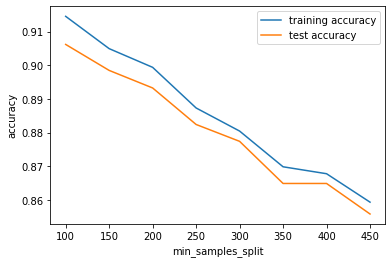

In [48]:
plt.figure()
plt.plot(scores['param_min_samples_split'],scores['mean_train_score'],label="training accuracy")
plt.plot(scores['param_min_samples_split'],scores['mean_test_score'],label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.legend()
plt.show()

### Grid Search to find Optimal Hyperparameters

In [49]:
param_grid={'max_depth':[3,6,9],'n_estimators':[200,300,500],'max_features':[5,10],'min_samples_split':[100,200,300],'min_samples_leaf':[100,200,300]}
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)

In [50]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 12.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [51]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8940832724616509 using {'max_depth': 9, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 200}


## Fitting the final model with the best parameters obtained from grid search.¶

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=8,
                             n_estimators=80)

In [53]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
predictions = rfc.predict(X_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.49      0.65       609
           1       0.00      0.00      0.00       107
           2       0.89      1.00      0.94      3391

    accuracy                           0.90      4107
   macro avg       0.63      0.50      0.53      4107
weighted avg       0.88      0.90      0.87      4107



In [57]:
print(confusion_matrix(y_test,predictions))

[[ 296    0  313]
 [   0    0  107]
 [   0    0 3391]]
